**Challenge on KNN**

I chose to use Contracetpive Method Choice Data Set
https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

Used KNN classification to look at how Wife's Age (numeric), Number of childern ever born (numberic), and Wife working (binary) are related to each other. 

With this data set showed that the majority of women did not work associated with these variables. 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [15]:
data_path = ("https://raw.githubusercontent.com/DMiller78/Preparing-Dataset-for-Modeling/master/cmc")
cmc = pd.read_csv(data_path, delimiter= ',', header=None)
cmc.columns = ['Wife_age', 'Wife_education', 'Husband_education', 'Number_of_childern_ever_born', 'Wife_religion',
                  'Wife_now_working', 'Husband_occupation', 'Standard_of_living_index', 'Media_exposure', 'Contraceptive_method_used']

In [16]:
cmc.head()

,Wife_age,Wife_education,Husband_education,Number_of_childern_ever_born,Wife_religion,Wife_now_working,Husband_occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


**Attribute Information:**


https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.names


   1. Wife's age                     (numerical)
   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
   4. Number of children ever born   (numerical)
   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
   6. Wife's now working?            (binary)           0=Yes, 1=No
   7. Husband's occupation           (categorical)      1, 2, 3, 4
   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
   9. Media exposure                 (binary)           0=Good, 1=Not good
   10. Contraceptive method used     (class attribute)  1=No-use 
                                                        2=Long-term
                                                        3=Short-term

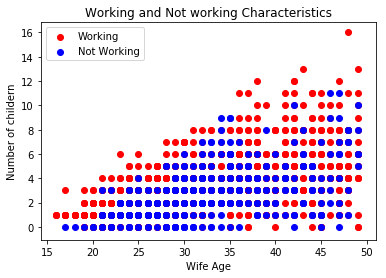

In [18]:

# Look at our data.
plt.scatter(
    cmc[cmc['Wife_now_working'] == 1].Wife_age,
    cmc[cmc['Wife_now_working'] == 1].Number_of_childern_ever_born,
    color='red'
)
plt.scatter(
    cmc[cmc['Wife_now_working'] == 0].Wife_age,
    cmc[cmc['Wife_now_working'] == 0].Number_of_childern_ever_born,
    color='blue'
)
plt.legend(['Working', 'Not Working'])
plt.title('Working and Not working Characteristics')
plt.xlabel('Wife Age')
plt.ylabel('Number of childern')
plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = cmc[['Number_of_childern_ever_born', 'Wife_age']]
Y = cmc.Wife_now_working
neighbors.fit(X,Y)

neighbors.predict([[25, 3]])

array([1], dtype=int64)

In [26]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = cmc[['Number_of_childern_ever_born', 'Wife_age']]
Y = cmc.Wife_now_working
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[35, 4]]))
print(neighbors.predict_proba([[35, 4]]))

[1]
[[0. 1.]]


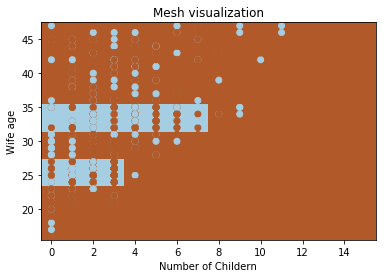

In [28]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Number of Childern')
plt.ylabel('Wife age')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

The blue area is predicted women working and brown is predicted women not working. Overwhelming seems that women who participated in this study were not working. 